# Network Notes

In [201]:
# good 160 unit *3 network
network_model = "func-22-2-4"
iter1 = 300
iter2 = 1490
codec = 3200
model_type = 'functional'

output_fn_postfix1 = "output_" + str(0) + "_" + str(iter1)
output_fn_postfix1_mid = "output_" + str(1) + "_" + str(iter1)

output_index = 1
output_fn_postfix2 = "output_" + str(output_index) + "_" + str(iter2)
'''
network_model = "tale-prog-large3dense5"
iter1 = 5
iter2 = 50

network_model = "tale-prog-large3dense6"
iter1 = 5
iter2 = 30

network_model = "tale-prog-large3alt1"
iter1 = 5 #good
iter2 = 110

network_model = "tale-prog-quick2"
iter1 = 55
iter2 = 340
'''
# full set of 320 unit *3 network
#network_model = "tale-prog-stateful8l"
#iter1 = 500
#iter2 = 505

#network_model = "tale-prog-lg123alt"
#iter1 = 5
#iter2 = 55

from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



Training Iteration 545 
using full set of frames 
Training Iteration 546 
using full set of frames 
Training Iteration 547 
using full set of frames 
Training Iteration 548 
using full set of frames 
Training Iteration 549 
using full set of frames 
Interrupt signal caught. Closing gracefully. 
saving config 

'


In [202]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


start_iteration :  549
num_iterations :  1200
fit_batch_size :  100
learn_next_step :  True
gen_every_nth :  30
generate_num_outputs :  2
save_model_every_nth :  30
framelen :  13
frame_seq_len :  100
overlap_sequence :  2
seed_seq_len :  100
seq_step :  96
test_data_fn :  ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200
frame_prop_orig_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
frame_prop_loss_scale :  [1000.0, 1000.0, 1000.0, 700.0, 600.0, 500.0, 400.0, 300.0, 200.0, 100.0, 60.0, 31.0, 16.0]
stateful :  False
shuffle :  False
limit_frames :  0
optimizer :  {'name': 'Nadam', 'params': {}}
generate_len :  200
model_filename :  out/func-22-2-4/model-549.h5
frame_len_ms :  20


In [203]:
try:
  with open(home + "/store/c2gen/out/" + network_model + '/notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

# func-22-2-4 Notes

2017-12-03 19:09:33

Run with arguments ./test/critiquepracticalreason_00_kant_64kb.c2cb-3200 

## Description

Even simpler test


In [204]:
if model_type != 'functional':
  nd.model_config(network_model)

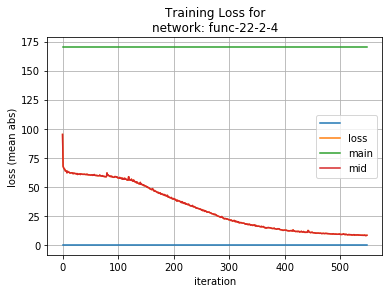

In [205]:
nd.plot_training_loss(network_model, 'mean abs') 

In [206]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    rl = f.readlines()
    print(str.join("",rl[0:1]))
    print(str.join("",rl[-10:]))
    

with open(home + "/store/c2gen/out/"+network_model+"/iteration_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    

epoch,loss,main_output_loss,mid_output_loss

0,8.26671161349,170.066143901,8.26671161349
0,8.41255488582,170.066143901,8.41255488582
0,8.18493092454,170.066143901,8.18493092454
0,8.26873307535,170.066143901,8.26873307535
0,8.35653843709,170.066143901,8.35653843709
0,8.5014126695,170.066143901,8.5014126695
0,8.03298325609,170.066143901,8.03298325609
0,8.12385485301,170.066143901,8.12385485301
0,8.09593793587,170.066143901,8.09593793587
0,8.30752303932,170.066143901,8.30752303932

549


In [207]:
try:
  print("Latest Iteration:", latest_iter)
  
  output_fn_postfix = "output_" + str(0) + "_" + str(latest_iter)
  output_fn_postfix_mid = "output_" + str(1) + "_" + str(latest_iter)
    
  nd.plot_codec_params(network_model,output_fn_postfix, scale_up='orig')
  nd.plot_spec_params(network_model,output_fn_postfix, params='Voicing')
  nd.plot_spec_params(network_model,output_fn_postfix, params='Wo')
  nd.plot_spec_params(network_model,output_fn_postfix, params='E')
  nd.plot_spec_params(network_model,output_fn_postfix, params='LSPs')
except FileNotFoundError:
    print("File not found")

Latest Iteration: 549
File not found


In [208]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

file not found



In [209]:
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

try:
  nd.plot_audio_waveform(network_model, output_fn_postfix_mid)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix_mid)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

file not found



Early Iterations
===

3200 rate codec



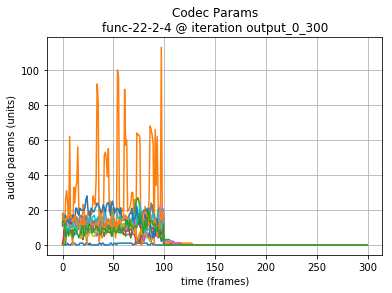

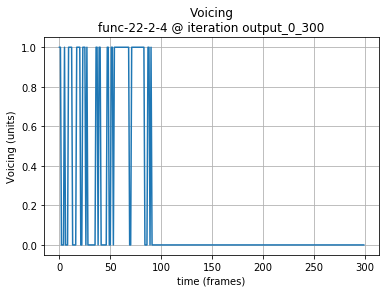

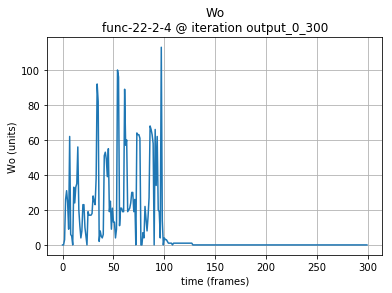

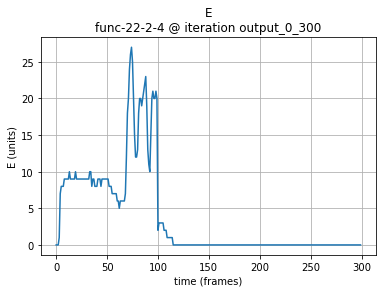

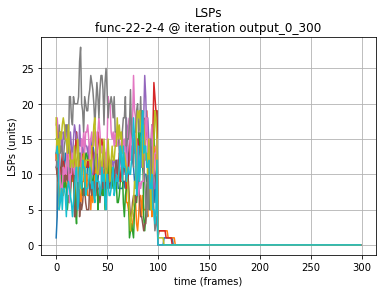

In [210]:
nd.plot_codec_params(network_model,output_fn_postfix1, scale_up='orig')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix1, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix1, params='E')
nd.plot_spec_params(network_model,output_fn_postfix1, params='LSPs')

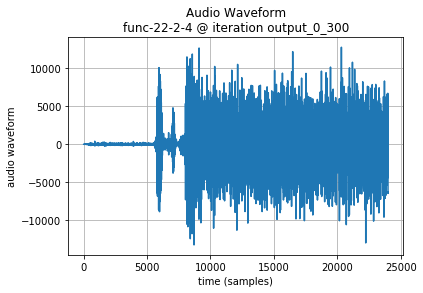

In [211]:
nd.plot_audio_waveform(network_model, output_fn_postfix1)

Listen to the WAV file

In [212]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1)+codec_sub+".wav"))

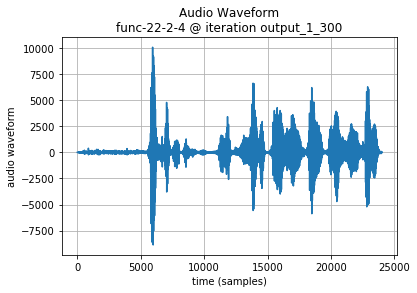

In [213]:
nd.plot_audio_waveform(network_model, output_fn_postfix1_mid)

In [214]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix1_mid)+codec_sub+".wav"))

Later Iterations
===

In [215]:
nd.plot_codec_params(network_model,output_fn_postfix2, scale_up=True)
nd.plot_spec_params(network_model,output_fn_postfix2, params='Voicing')
nd.plot_spec_params(network_model,output_fn_postfix2, params='Wo')
nd.plot_spec_params(network_model,output_fn_postfix2, params='E')
nd.plot_spec_params(network_model,output_fn_postfix2, params='LSPs')

FileNotFoundError: [Errno 2] No such file or directory: '/home/phil/store/c2gen/out/func-22-2-4/out-c2cb-output_1_1490'

In [ ]:
nd.plot_audio_waveform(network_model, output_fn_postfix2)

Listen to the WAV file

In [ ]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(output_fn_postfix2)+codec_sub+".wav"))

## 